# 1.7 Network graph visualization

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis 

2. Import the country relationships file (that you created in the previous task) as a dataframe in a new notebook.

In [4]:
# Import relationship data

relationship_df = pd.read_csv('country_relationship.csv', index_col = 0)

In [5]:
relationship_df

,source,target,value
0,France,Italy,10
1,Italy,Russia,6
2,Germany,Russia,26
3,Bulgaria,Germany,6
4,Bulgaria,Russia,6
...,...,...,...
75,Greece,Italy,4
76,Italy,Japan,6
77,Romania,Russia,6
78,India,Lebanon,3


3. Create a network object from the countries relationships dataframe.

In [7]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

4. Create a static network graph using only NetworkX.

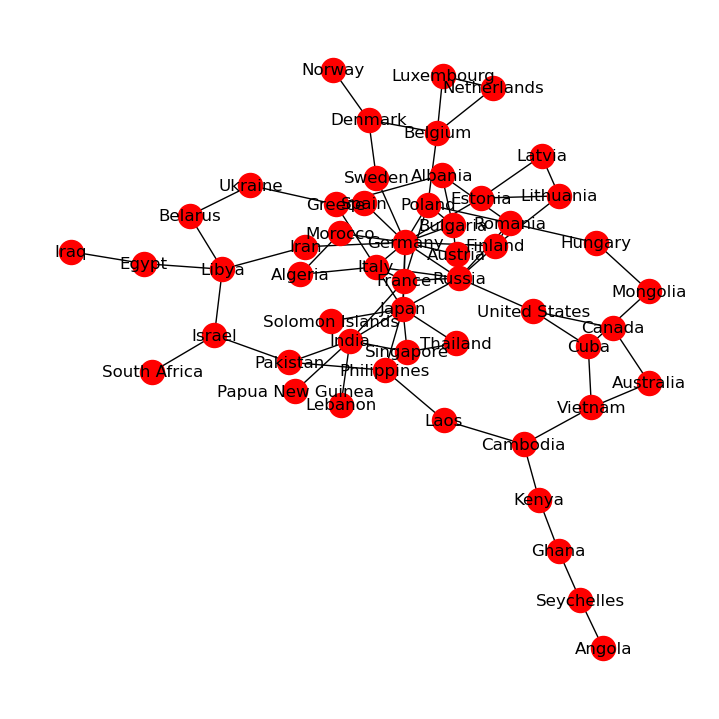

In [9]:
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [10]:
h.savefig('networkx_plt_century.png')

5. Switch to pyvis, build an interactive network graph from your network object, and save it as an HTML file

In [12]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("20th_century.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [13]:
from cdlib import algorithms
coms = algorithms.leiden(G)

/Users/sydneyhoy/anaconda3/envs/20th_century/lib/python3.12/site-packages/cdlib/classes/node_clustering.py:155: SyntaxWarning: invalid escape sequence '\{'
  """
/Users/sydneyhoy/anaconda3/envs/20th_century/lib/python3.12/site-packages/cdlib/classes/node_clustering.py:272: SyntaxWarning: invalid escape sequence '\{'
  """
/Users/sydneyhoy/anaconda3/envs/20th_century/lib/python3.12/site-packages/cdlib/classes/node_clustering.py:296: SyntaxWarning: invalid escape sequence '\{'
  """
/Users/sydneyhoy/anaconda3/envs/20th_century/lib/python3.12/site-packages/cdlib/classes/node_clustering.py:319: SyntaxWarning: invalid escape sequence '\{'
  """
/Users/sydneyhoy/anaconda3/envs/20th_century/lib/python3.12/site-packages/cdlib/classes/node_clustering.py:343: SyntaxWarning: invalid escape sequence '\{'
  """
/Users/sydneyhoy/anaconda3/envs/20th_century/lib/python3.12/site-packages/cdlib/classes/node_clustering.py:663: SyntaxWarning: invalid escape sequence '\s'
  """Average embeddedness of nodes

ImportError: dlopen(/Users/sydneyhoy/anaconda3/envs/20th_century/lib/python3.12/site-packages/igraph/_igraph.abi3.so, 0x0002): Library not loaded: @rpath/libblas.3.dylib
  Referenced from: <26F96EFB-E6FB-34B7-A329-52A241449097> /Users/sydneyhoy/anaconda3/envs/20th_century/lib/python3.12/site-packages/igraph/_igraph.abi3.so
  Reason: tried: '/Users/sydneyhoy/anaconda3/envs/20th_century/lib/python3.12/site-packages/igraph/../../../libblas.3.dylib' (no such file), '/Users/sydneyhoy/anaconda3/envs/20th_century/lib/python3.12/site-packages/igraph/../../../libblas.3.dylib' (no such file), '/Users/sydneyhoy/anaconda3/envs/20th_century/bin/../lib/libblas.3.dylib' (no such file), '/Users/sydneyhoy/anaconda3/envs/20th_century/bin/../lib/libblas.3.dylib' (no such file), '/usr/local/lib/libblas.3.dylib' (no such file), '/usr/lib/libblas.3.dylib' (no such file, not in dyld cache)